In [1]:
import numpy as np 
from sklearn.neighbors import BallTree

In [2]:
import matplotlib.pyplot as plt

from PIL import Image

from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras.models import Sequential
# from keras.utils import to_categorical

import os

import random
random.seed(0)
import warnings
warnings.filterwarnings('ignore')

In [55]:
PATH = '../dvirs/notMNIST_small'

classes = os.listdir(PATH)
num_classes = len(classes)

print("There are {} classes: {}".format(num_classes, classes))

There are 10 classes: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']


In [56]:
X = []
y = []

for directory in os.listdir(PATH):
    for image in os.listdir(PATH + '/' + directory):
        try:
            path = PATH + '/' + directory + '/' + image
            img = Image.open(path)
            img.load()
            img_X = np.asarray(img, dtype=np.int16)
            X.append(img_X)
            y.append(directory)
        except:
            None
            
X = np.asarray(X)
y = np.asarray(y)

In [57]:
num_images = len(X)
print(num_images)


size = len(X[0])
print(size)

X.shape, y.shape

18724
28


((18724, 28, 28), (18724,))

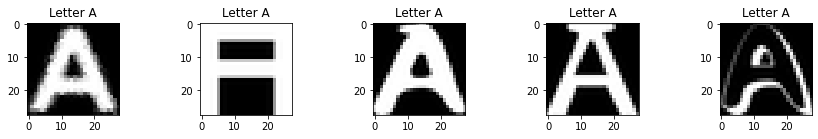

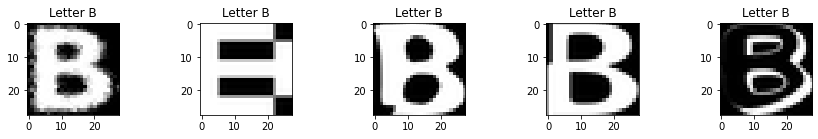

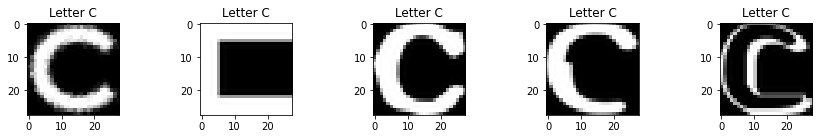

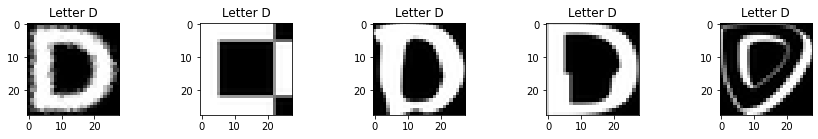

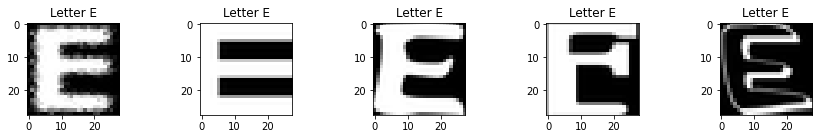

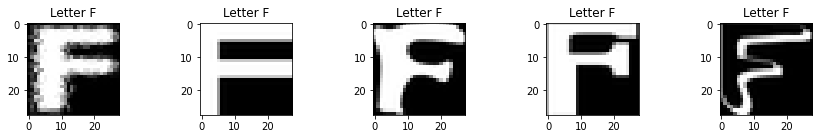

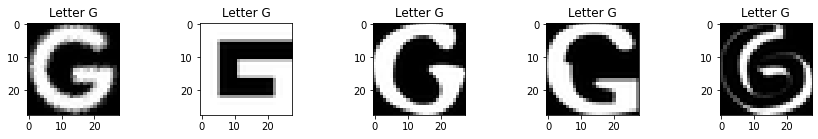

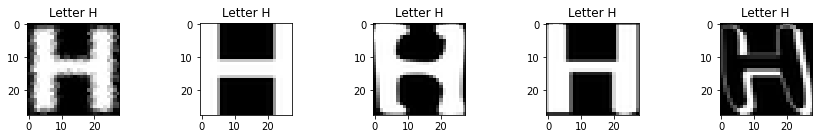

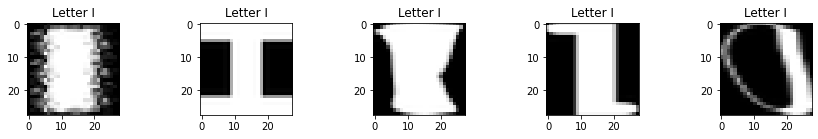

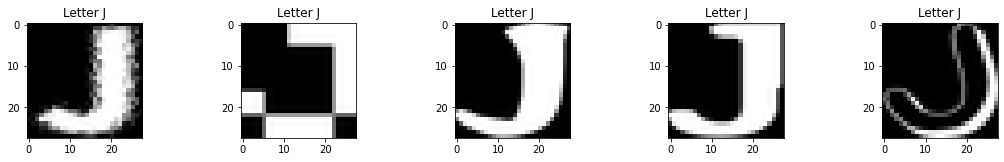

In [58]:
for let in sorted(classes):
    letter = X[y == let] 

    plt.figure(figsize=(15,20))
    for i in range(5):
        plt.subplot(10, 5, i+1)
        plt.imshow(letter[i], cmap='gray')
        plt.title("Letter {}".format(let))
    
plt.tight_layout()
plt.show()

In [59]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{'A': 1872,
 'B': 1873,
 'C': 1873,
 'D': 1873,
 'E': 1873,
 'F': 1872,
 'G': 1872,
 'H': 1872,
 'I': 1872,
 'J': 1872}

In [60]:
y = list(map(lambda x: ord(x) - ord('A'), y))
y = np.asarray(y)
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 1872,
 1: 1873,
 2: 1873,
 3: 1873,
 4: 1873,
 5: 1872,
 6: 1872,
 7: 1872,
 8: 1872,
 9: 1872}

In [61]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score,ShuffleSplit
import math as m

X_train, X_test, y_train, y_test = train_test_split(X, y)

X_test = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])

In [62]:
def BkX(X,new_x,k , tree):
    dist, index = tree.query(new_x, k=k)
    return index

In [92]:
def isSignificant(K_nei_index, y_train, num_of_class ,k, threshold):
    Y_k_index = y_train[K_nei_index][0]
    print(Y_k_index)
    label = None
    true_count = 0
    
    for y in range(num_of_class):
        num_of_y = 0
        
        for i in Y_k_index:
            if i == y : num_of_y+=1
        
        if ((num_of_y/k) - (1/num_of_class)) > threshold :
            true_count+=1
            label = y   
        
    return true_count==1, label

In [99]:
def AKNN(X_train, num_of_class, new_x, C, delta , Kmax):
    #create distance tree
    tree = BallTree(X_train)
    
#     loop over all required K and buil BkX for each K
    B = dict()
    for k in range(2,Kmax):
        
        B[k]= BkX(X_train,new_x, k, tree)
        
        n = X_train.shape[0]
        threshold = C * m.sqrt((m.log(n) + m.log(1/delta)) /k)
        
        flag,  label = isSignificant(B[k], y_train, num_of_class ,k, 0.9 )
        
        if flag == True : return label 
        
    return np.bincount(y_train[B[k]][0]) 

<function matplotlib.pyplot.show(close=None, block=None)>

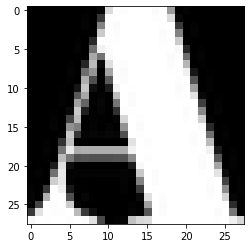

In [100]:
new_x = X_test[3960]
plt.imshow(new_x.reshape((28,28)), cmap='gray')
plt.show

In [101]:
label = AKNN(X_train, 10, [new_x], 1 , 0.5, 13)
print(label)

[0 0]
[0 0 0]
[0 0 0 0]
[0 0 0 0 0]
[0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0]
[12]


In [39]:
>>> import numpy as np
>>> from sklearn.neighbors import BallTree
>>> rng = np.random.RandomState(0)
>>> X = rng.random_sample((10, 3))  # 10 points in 3 dimensions
>>> tree = BallTree(X, leaf_size=2)              
>>> dist, ind = tree.query(X[:1], k=3) 
print(X[0])
print(X[:1])
>>> print(ind)  # indices of 3 closest neighbors
>>> print(dist)  # distances to 3 closest neighbors


[0.5488135  0.71518937 0.60276338]
[[0.5488135  0.71518937 0.60276338]]
[[0 3 1]]
[[0.         0.19662693 0.29473397]]


In [41]:
from collections import defaultdict
from itertools import groupby
from operator import itemgetter

L = [1,2,45,55,5,4,4,4,4,4,4,4,4,5456,56,6,7,67]
d = defaultdict(int)
for i in L:
    d[i] += 1

a, b = (max(d.items(), key=itemgetter(1)))

print(a)
print(b)


4
8
